In [14]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
# Question 1
rate = 0.08
q1_cfs = [-100,20,20,20,33]
npf.npv(rate,q1_cfs)

# The company should not take on this project

-24.202075112759463

In [3]:
# Quesiton 2
q2_cfs = [-100,55,85]
npf.irr(q2_cfs)

# IRR = -100 + (55/[1+r]) + (85/[1+r]^2)

0.23709407024469287

CF A IRR: 0.194
CF B IRR: 0.222
Crossover Rate: 0.118
50.68883707497258
50.68883707497261
   Rate   CF A NPVs   CF B NPVs
0  0.01  140.378394  117.841388
1  0.02  131.007305  110.861207
2  0.03  121.877651  104.053162
3  0.04  112.980769   97.411243
4  0.05  104.308390   90.929705


<AxesSubplot:xlabel='Rate'>

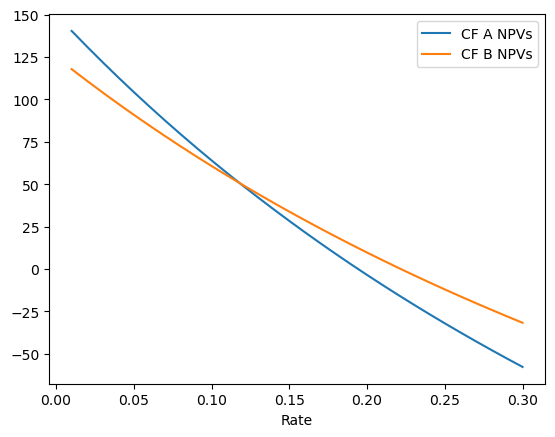

In [23]:
# Question 3
q3_cf_a = np.array([-500,325,325])
q3_cf_b = np.array([-400,325,200])

#Crossover Rate
# -500 + (325/[1+r]) + (325/[1+r]^2) = -400 + (325/[1+r]) + (200/[1+r]^2)

print(f"CF A IRR: {round(npf.irr(q3_cf_a),3)}")
print(f"CF B IRR: {round(npf.irr(q3_cf_b),3)}")

q3_cf_delta = q3_cf_a - q3_cf_b
print(f"Crossover Rate: {round(npf.irr(q3_cf_delta),3)}")
testIRR = npf.irr(q3_cf_delta)
print(npf.npv(testIRR,q3_cf_a))
print(npf.npv(testIRR,q3_cf_b))

# Create a line chart with NPV profiles
npvRates = np.arange(0.01,0.31,0.01)
cfANPVs = []
cfBNPVs = []

for rate in npvRates:
    cfANPVs.append(npf.npv(rate,q3_cf_a))
    cfBNPVs.append(npf.npv(rate,q3_cf_b))

cfs_df = pd.DataFrame({"Rate": npvRates,
                       "CF A NPVs": cfANPVs,
                       "CF B NPVs": cfBNPVs})
print(cfs_df.head())

cfs_df.plot(x="Rate",y=["CF A NPVs", "CF B NPVs"])